# Familiarity with data and data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
filepath_train_data="./datasets/train.csv"
filepath_test_data="./datasets/test.csv"

df_train = pd.read_csv(filepath_train_data)
df_test = pd.read_csv(filepath_test_data) 

In [4]:
df_train.set_index("Id",inplace=True)
df_test.set_index("Id",inplace=True)

In [5]:
df_train.shape

(2051, 80)

In [6]:
df_test.shape

(878, 79)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [8]:
df_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
df_train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 79 columns):
PID                878 non-null int64
MS SubClass        878 non-null int64
MS Zoning          878 non-null object
Lot Frontage       718 non-null float64
Lot Area           878 non-null int64
Street             878 non-null object
Alley              58 non-null object
Lot Shape          878 non-null object
Land Contour       878 non-null object
Utilities          878 non-null object
Lot Config         878 non-null object
Land Slope         878 non-null object
Neighborhood       878 non-null object
Condition 1        878 non-null object
Condition 2        878 non-null object
Bldg Type          878 non-null object
House Style        878 non-null object
Overall Qual       878 non-null int64
Overall Cond       878 non-null int64
Year Built         878 non-null int64
Year Remod/Add     878 non-null int64
Roof Style         878 non-null object
Roof Matl          878 non-null object
E

In [11]:
df_test.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [12]:
df_train.isnull().sum().sort_values(ascending=False)[:30]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Finish      114
Garage Cond        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Year Built           0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [13]:
df_test.isnull().sum().sort_values(ascending=False)[:30]

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Qual          25
Bsmt Cond          25
BsmtFin Type 2     25
Mas Vnr Area        1
Electrical          1
Mas Vnr Type        1
Year Built          0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Sale Type           0
Overall Cond        0
dtype: int64

Columns have NaN in them that aren't meant to be a number. 

The following should be NA from the data dictionary:

Alley (Nominal) 
Bsmt Qual (Ordinal)
Bsmt Cond (Ordinal)
Bsmt Exposure	(Ordinal)
BsmtFin Type 1
BsmtFinType 2
FireplaceQu
Garage Type (Nominal)
Garage Finish (Ordinal)	
Garage Qual (Ordinal)
Garage Cond (Ordinal):
Pool QC (Ordinal):
Fence (Ordinal):
Misc Feature (Nominal)

In [14]:
cols_na= ["Alley","Bsmt Qual","Bsmt Cond","Bsmt Exposure","BsmtFin Type 1","BsmtFin Type 2","Fireplace Qu","Garage Type","Garage Finish","Garage Qual","Garage Cond","Pool QC","Fence","Misc Feature"]

[df_train[cols].fillna("NA",inplace=True) for cols in cols_na]
[df_test[cols].fillna("NA",inplace=True) for cols in cols_na]
#do this for your test and trainig

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
df_train.head(30)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500
138,535126040,20,RL,137.0,16492,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2010,WD,190000
2827,908186070,180,RM,35.0,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NA,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,6,2006,New,140000
145,535154050,20,RL,NaN,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
1942,535353130,20,RL,NaN,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952.0

In [16]:
#Mas Vnr Type has None and NaN 
df_train["Mas Vnr Type"].fillna("None",inplace=True) 
df_test["Mas Vnr Type"].fillna("None",inplace=True)

In [17]:
#replace not a number with 0 
df_train["Mas Vnr Area"].fillna(0 ,inplace=True) 
df_test["Mas Vnr Area"].fillna(0 ,inplace=True)

We can use the median or mean for NaN values, there isn't a big difference between these numbers 

In [18]:
df_train["Lot Frontage"].median()

68.0

In [19]:
df_train["Lot Frontage"].fillna(69.05520046484602 ,inplace=True) 
df_test["Lot Frontage"].fillna(69.05520046484602 ,inplace=True)
#mean and median are similar here

In [20]:
{final: df_train[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{'BsmtFin SF 1': 1,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Garage Yr Blt': 114,
 'Garage Cars': 1,
 'Garage Area': 1}

In [21]:
df_train["Garage Yr Blt"].median()

1980.0

In [22]:
df_train["Garage Yr Blt"].fillna(1978.7077955601446 ,inplace=True) 
df_test["Garage Yr Blt"].fillna(1978.7077955601446 ,inplace=True)
#mean and median are similar here

In [23]:
{final: df_train[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{'BsmtFin SF 1': 1,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Garage Cars': 1,
 'Garage Area': 1}

In [24]:
df_train["BsmtFin SF 1"].dropna(inplace=True) 
df_test["BsmtFin SF 1"].dropna(inplace=True)

In [25]:
df_train["Bsmt Unf SF"].dropna(inplace=True) 
df_test["Bsmt Unf SF"].dropna(inplace=True)

In [26]:
df_train["BsmtFin SF 2"].dropna(inplace=True) 
df_test["BsmtFin SF 2"].dropna(inplace=True)

In [27]:
df_train["Total Bsmt SF"].dropna(inplace=True) 
df_test["Total Bsmt SF"].dropna(inplace=True)

In [28]:
df_train["Bsmt Full Bath"].dropna(inplace=True) 
df_test["Bsmt Full Bath"].dropna(inplace=True)

In [29]:
df_train["Bsmt Half Bath"].dropna(inplace=True) 
df_test["Bsmt Half Bath"].dropna(inplace=True)

In [30]:
df_train["Garage Cars"].dropna(inplace=True) 
df_test["Garage Cars"].dropna(inplace=True)

In [31]:
df_train["Garage Area"].dropna(inplace=True) 
df_test["Garage Area"].dropna(inplace=True)

In [32]:
{final: df_train[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{}

In [33]:
{final: df_test[final].isnull().sum() for final in df_train.columns if df_train[final].isnull().sum() > 0}

{}

In [34]:
#rename our colmns 
def clean(df):
    df.columns=df.columns.str.lower().str.replace("/ ","_").str.replace(" ","_")
    return df 

In [35]:
df_train=clean(df_train)

In [36]:
df_test=clean(df_test)

In [37]:
conv_dict={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0,"NA":6.0}
df_train["fireplace_qu"]=df_train["fireplace_qu"].apply(conv_dict.get)

In [175]:
df_test["fireplace_qu"]=df_test["fireplace_qu"].apply(conv_dict.get)

In [38]:
df_train["fireplace_qu"]

Id
109     6.0
544     3.0
153     6.0
318     6.0
255     6.0
       ... 
1587    2.0
785     6.0
916     3.0
639     2.0
10      3.0
Name: fireplace_qu, Length: 2051, dtype: float64

In [39]:
conv_dict_exter={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0}
df_train["exter_qual"]=df_train["exter_qual"].apply(conv_dict_exter.get)

In [40]:
df_test["exter_qual"]=df_test["exter_qual"].apply(conv_dict_exter.get)

In [41]:
df_train["exter_qual"]

Id
109     2.0
544     2.0
153     3.0
318     3.0
255     3.0
       ... 
1587    2.0
785     3.0
916     3.0
639     3.0
10      3.0
Name: exter_qual, Length: 2051, dtype: float64

In [42]:
conv_dict_bsmt_qual={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0,"NA":6.0}
df_train["bsmt_qual"]=df_train["bsmt_qual"].apply(conv_dict_bsmt_qual.get)

In [178]:
df_test["bsmt_qual"]=df_test["bsmt_qual"].apply(conv_dict_bsmt_qual.get)

In [43]:
conv_dict_electrical={'SBrkr':1.0,'FuseA':2.0,'FuseF':3.0,'FuseP':4.0,"Mix":5.0}
df_train["electrical"]=df_train["electrical"].apply(conv_dict_electrical.get)

In [169]:
df_test["electrical"]=df_test["electrical"].apply(conv_dict_electrical.get)

In [44]:
conv_dict_functional={'Typ':1.0,'Min1':2.0,'Min2':3.0,'Mod':4.0,"Maj1":5.0,"Maj2":6.0,"Sev":7.0,"Sal":8.0}
df_train["functional"]=df_train["functional"].apply(conv_dict_functional.get)

In [170]:
df_test["functional"]=df_test["functional"].apply(conv_dict_functional.get)

In [45]:
conv_dict_kitchen={'Ex':1.0,'Gd':2.0,'TA':3.0,'Fa':4.0,"Po":5.0}
df_train["kitchen_qual"]=df_train["kitchen_qual"].apply(conv_dict_kitchen.get)

In [171]:
df_test["kitchen_qual"]=df_test["kitchen_qual"].apply(conv_dict_kitchen.get)

In [46]:
df_train["kitchen_qual"]

Id
109     2.0
544     2.0
153     2.0
318     3.0
255     3.0
       ... 
1587    2.0
785     3.0
916     3.0
639     3.0
10      2.0
Name: kitchen_qual, Length: 2051, dtype: float64

# EDA

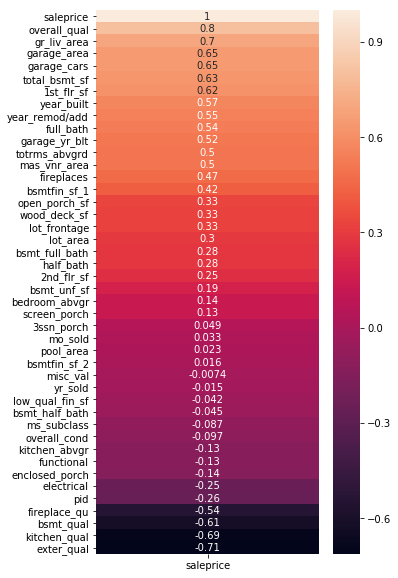

In [47]:
plt.figure(figsize=(5,10))
sns.heatmap(df_train.corr()[["saleprice"]].sort_values(by="saleprice",ascending=False), annot=True)

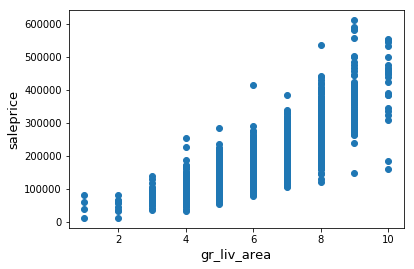

In [48]:
fig,ax=plt.subplots()
ax.scatter(x=df_train["overall_qual"], y=df_train["saleprice"])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('gr_liv_area', fontsize=13)
plt.show()

#what have you done to reduce multicollinearity 
#polynomial features class - will help with multicollinrarity 


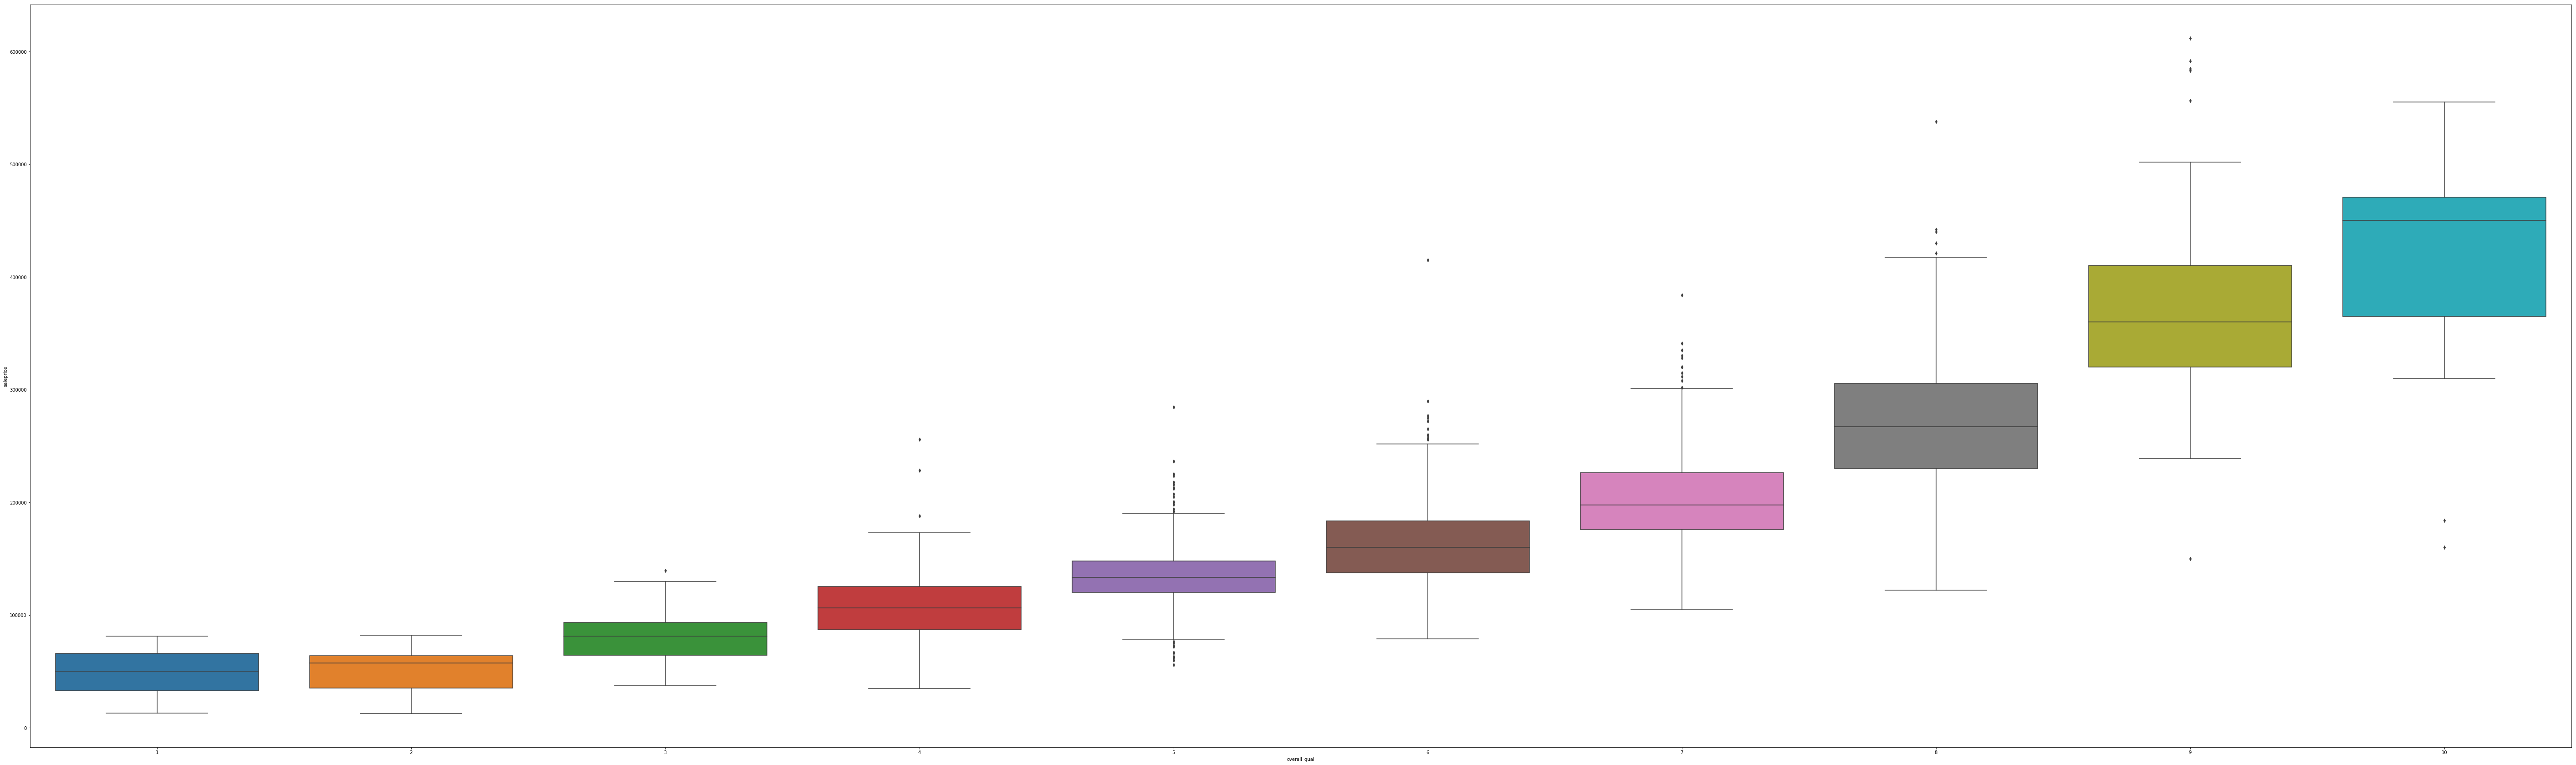

In [49]:
plt.figure(figsize=(100,30))
sns.boxplot(df_train["overall_qual"],df_train["saleprice"])
# rc={'axes.labelsize': 32, 'font.size': 32, 'legend.fontsize': 32.0, 'axes.titlesize': 32}
# plt.rcParams.update(**rc)

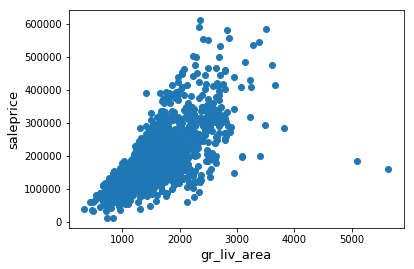

In [50]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['gr_liv_area'], y = df_train['saleprice'])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('gr_liv_area', fontsize=13)
plt.show()

In [51]:
df_train=df_train.drop(df_train[(df_train["gr_liv_area"]>4000)].index)
#Get rid of outliers here 

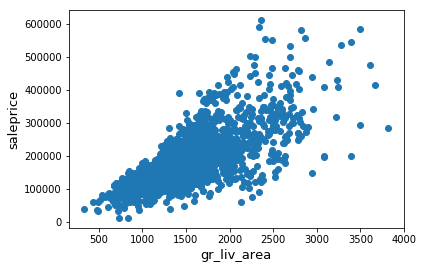

In [52]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['gr_liv_area'], y = df_train['saleprice'])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('gr_liv_area', fontsize=13)
plt.show()

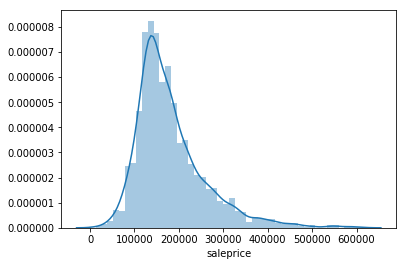

In [53]:
sns.distplot(df_train["saleprice"])

In [54]:
{final: df_train[final].isnull().mean()*100 for final in df_train.columns if df_train[final].isnull().mean() > 0}

{'bsmtfin_sf_1': 0.04880429477794046,
 'bsmtfin_sf_2': 0.04880429477794046,
 'bsmt_unf_sf': 0.04880429477794046,
 'total_bsmt_sf': 0.04880429477794046,
 'bsmt_full_bath': 0.09760858955588092,
 'bsmt_half_bath': 0.09760858955588092,
 'garage_cars': 0.04880429477794046,
 'garage_area': 0.04880429477794046}

In [55]:
df_train.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

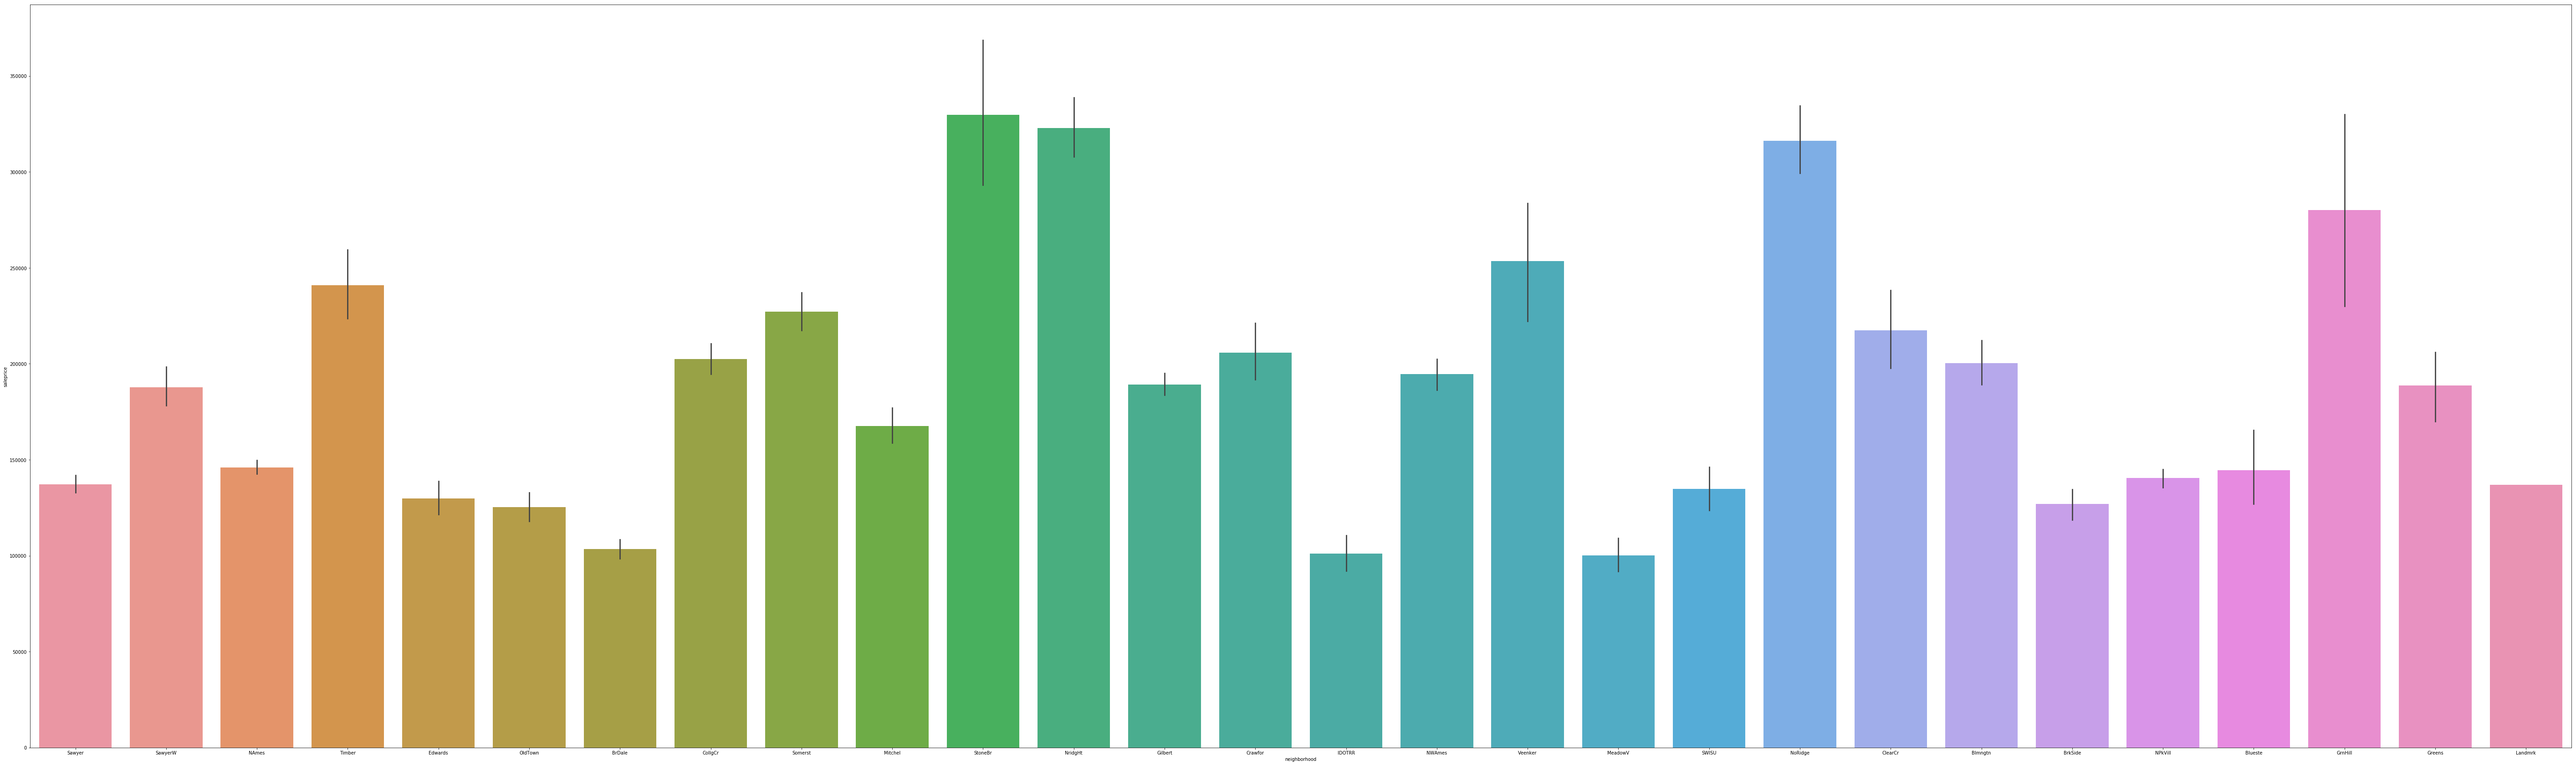

In [56]:
plt.figure(figsize=(100,30))
sns.barplot(x=df_train['neighborhood'],y=df_train['saleprice'])
rc={'axes.labelsize': 32, 'font.size': 32, 'legend.fontsize': 32.0, 'axes.titlesize': 32}
plt.rcParams.update(**rc)

In [57]:
df_train.groupby("neighborhood").mean()["saleprice"].sort_values(ascending=False)
#neighborhood has an impact on price
# can we make it ordinal? 

neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    129905.787234
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64

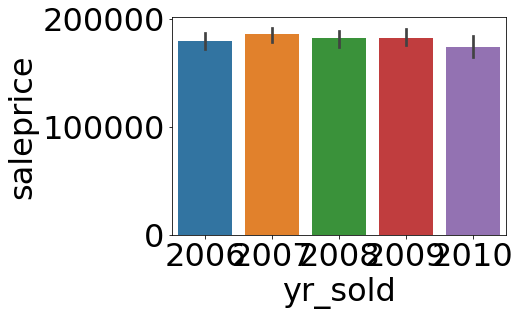

In [58]:
sns.barplot(x=df_train["yr_sold"],y=df_train['saleprice'])

In [59]:
#check columns to see if there is a big difference in saleprice 
df_train.groupby("neighborhood")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
neighborhood,,
StoneBr,329675.736842,128597.738212
NridgHt,322831.352459,92964.835768
NoRidge,316294.125000,67015.947652
GrnHill,280000.000000,70710.678119
Veenker,253570.588235,69147.647869
Timber,241051.354167,70247.203305
Somerst,227183.900000,55518.617822
ClearCr,217490.074074,53479.942309
Crawfor,205901.211268,60856.738509


In [60]:
df_train.groupby("neighborhood").mean()["saleprice"].sort_values(ascending=False)

neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    129905.787234
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64

In [61]:
df_train.groupby("kitchen_qual")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
kitchen_qual,,
1.0,338632.510067,101230.223568
2.0,211629.451613,63278.150480
3.0,139501.607450,37832.983986
4.0,101334.957447,41957.590989


In [62]:
df_train.groupby("functional")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
functional,,
1.0,183967.326189,79709.491616
5.0,163106.166667,54563.184907
2.0,154429.761905,48195.569336
3.0,150424.571429,52177.996640
4.0,148108.724138,92052.265979
7.0,95750.000000,47022.600949
6.0,87157.714286,37181.726469
8.0,31550.000000,26092.240226


In [63]:
df_train.groupby("misc_feature")["saleprice"].agg([np.mean,np.std]).sort_values(by="mean", ascending=False)

,mean,std
misc_feature,,
TenC,250000.000000,NaN
NA,182175.624685,79959.806456
Othr,163166.666667,98750.105485
Shed,159042.732143,48268.869093
Gar2,146500.000000,41876.803444


In [64]:
df_train.groupby("fireplace_qu")["saleprice"].agg([np.mean,np.std,np.median]).sort_values(by="mean", ascending=False)

,mean,std,median
fireplace_qu,,,
1.0,331481.483871,104195.432710,320000
2.0,233815.061420,96582.400975,214000
3.0,204893.621622,62478.226103,188500
4.0,170287.203390,36515.654145,159500
6.0,142001.103000,45290.312181,136500
5.0,139263.967742,26441.825858,139000


In [65]:
df_train.columns[:100]

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [66]:
columns_to_drop=["","house_style","bldg_type","condition_2","condition_1","land_slope","lot_config","utilities","land_contour","lot_shape","street","alley","misc_val","misc_feature","pid","mo_sold","yr_sold","fence"] 

features_to_test_in_model= ["overall_qual","sale_type", "neighborhood","land_slope" ]
#sale condition is missing? 

In [67]:
df_train.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [68]:
df_train.dropna(inplace=True)

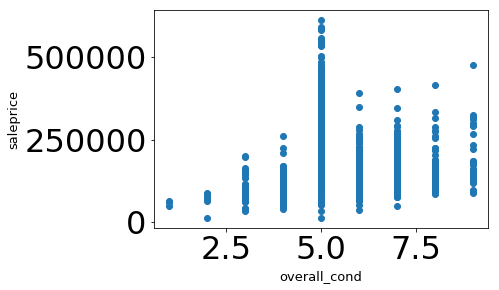

In [69]:
#overall_cond
fig, ax = plt.subplots()
ax.scatter(x = df_train['overall_cond'], y = df_train['saleprice'])
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('overall_cond', fontsize=13)
plt.show()

# Dummy Variables and Feature Engineering

In [70]:
#ID in data dictionary anything that has square feet 

# Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)

# Gr Liv Area (Continuous): Above grade (ground) living area square feet
    


# To get the total sq feet miuns the Gr Liv Area, we can add the following: 


# df_train["total_square_feet"]=  df_train["total_bsmt_sf"] + df_train["1st_flr_sf"] + df_train["2nd_flr_sf"] + df_train["pool_area"]+df_train["mas_vnr_area"]+df_train["garage_area"]+df_train["lot_area"]+df_train["wood_deck_sf"]+df_train["open_porch_sf"]+df_train["enclosed_porch"]+df_train["3ssn_porch"]+df_train["screen_porch"]

In [71]:
df_train["over_all_qual_and_cond"]= df_train["overall_qual"] * df_train["overall_cond"]

#'overall_qual', 'overall_cond'

In [72]:
df_test["over_all_qual_and_cond"]= df_test["overall_qual"] * df_test["overall_cond"]

In [73]:

# fig, ax = plt.subplots()
# ax.scatter(x = df_train['total_square_feet'], y = df_train['saleprice'])
# plt.ylabel('saleprice', fontsize=13)
# plt.xlabel('total_square_feet', fontsize=13)
# plt.show()

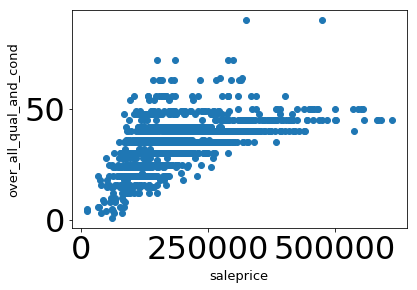

In [74]:
fig, ax = plt.subplots()
ax.scatter(x = df_train["saleprice"], y = df_train['over_all_qual_and_cond'])
plt.ylabel('over_all_qual_and_cond', fontsize=13)
plt.xlabel("saleprice", fontsize=13)
plt.show()

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 109 to 10
Data columns (total 81 columns):
pid                       2046 non-null int64
ms_subclass               2046 non-null int64
ms_zoning                 2046 non-null object
lot_frontage              2046 non-null float64
lot_area                  2046 non-null int64
street                    2046 non-null object
alley                     2046 non-null object
lot_shape                 2046 non-null object
land_contour              2046 non-null object
utilities                 2046 non-null object
lot_config                2046 non-null object
land_slope                2046 non-null object
neighborhood              2046 non-null object
condition_1               2046 non-null object
condition_2               2046 non-null object
bldg_type                 2046 non-null object
house_style               2046 non-null object
overall_qual              2046 non-null int64
overall_cond              2046 non-null int64
year

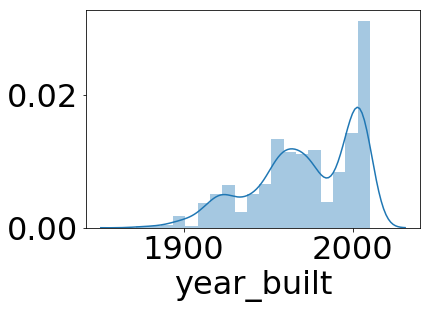

In [76]:
sns.distplot(df_train["year_built"])

In [77]:
df_train["year_built"].value_counts().sort_values(ascending=False)

2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
1885      1
1892      1
1879      1
1875      1
1872      1
Name: year_built, Length: 113, dtype: int64

In [78]:
neighborhoods= [column for column in df_train.columns if "neighborhood" in column ]

In [79]:
neighborhoods

['neighborhood']

In [80]:
neighborhoods_test= [column for column in df_test.columns if "neighborhood" in column ]

In [81]:
neighborhoods_test

['neighborhood']

In [82]:
df_train = pd.get_dummies(df_train, columns=['neighborhood'], drop_first=True)

In [83]:
df_test = pd.get_dummies(df_test, columns=['neighborhood'], drop_first=True)

In [84]:
df_train = pd.get_dummies(df_train, columns=['house_style'], drop_first=True)

In [85]:
df_train.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities',
       ...
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
       'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin',
       'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer',
       'house_style_SLvl'],
      dtype='object', length=113)

In [86]:
house_style_test= [column for column in df_train.columns if "house_style" in column ]

house_style_test

['house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Fin',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl']

In [87]:
df_train = pd.get_dummies(df_train, columns=['central_air'], drop_first=True)

In [88]:
central_air_test= [column for column in df_train.columns if "central_air" in column ]
central_air_test

['central_air_Y']

In [89]:
df_test = pd.get_dummies(df_test, columns=['house_style'], drop_first=True)

# Modeling

Linear Regression

In [197]:
features = ["fireplaces",'mas_vnr_area','totrms_abvgrd',"overall_qual","gr_liv_area","total_bsmt_sf","year_built",'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',"exter_qual", 
 'neighborhood_Veenker','house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Fin',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',"garage_area","garage_cars","full_bath","year_remod/add","kitchen_qual","bsmt_qual","fireplace_qu"]
X = df_train[features]
y = df_train["saleprice"]


In [198]:
lr=LinearRegression()

In [199]:
cross_val_score(lr,X,y,cv=5).mean()

0.8666849659915077

In [200]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
lr.score(X,y)

0.8752193372612069

In [202]:
def r2_adj(X,y): 
    lr= LinearRegression()
    model=lr.fit(X,y)
    r_squared=model.score(X,y)
    adjusted_r2_formula= 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r2_formula)

In [203]:
r2_adj(X,y)

0.87228405640599


# Using Standard Scalar and Lasso 

In [204]:
ss = StandardScaler()

# Fit.
X_train_ss = ss.fit_transform(X)

# Fit.
# X_test_ss = ss.transform(X_test)
# When transforming the data, it changes the values to their
# respective z-score (number of standard deviations from the mean of their distribution)
# But puts all features on the same scale


In [205]:
r_alphas = np.logspace(0, 5, 100)

lasso_model = LassoCV(alphas=r_alphas, cv=5, max_iter=5000)
# lasso_mode = LassoCV

In [206]:
X.shape

(2046, 47)

In [207]:
lasso_model = lasso_model.fit(X, y)

In [208]:
lasso_model.alpha_

58.570208180566674

In [209]:
print(lasso_model.score(X, y))

0.8741067296524324


# Using Ridge

In [210]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X, y)

# Evaluate model using R2.
print(ridge_model.score(X, y))

0.8741156370254922


# Kaggle

In [213]:
# features = ["overall_qual","gr_liv_area","total_bsmt_sf","year_built","overall_cond"]

features = ["fireplaces",'mas_vnr_area','totrms_abvgrd',"overall_qual","gr_liv_area","total_bsmt_sf","year_built",'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',"exter_qual", 
 'neighborhood_Veenker','house_style_1.5Unf',
 'house_style_1Story',
 'house_style_2.5Fin',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',"garage_area","garage_cars","full_bath","year_remod/add","kitchen_qual","bsmt_qual","fireplace_qu"]
# features = ["overall_qual","gr_liv_area","total_bsmt_sf","year_built",'neighborhood_Blueste',
#  'neighborhood_BrDale',
#  'neighborhood_BrkSide',
#  'neighborhood_ClearCr',
#  'neighborhood_CollgCr',
#  'neighborhood_Crawfor',
#  'neighborhood_Edwards',
#  'neighborhood_Gilbert',
#  'neighborhood_Greens',
#  'neighborhood_IDOTRR',
#  'neighborhood_MeadowV',
#  'neighborhood_Mitchel',
#  'neighborhood_NAmes',
#  'neighborhood_NPkVill',
#  'neighborhood_NWAmes',
#  'neighborhood_NoRidge',
#  'neighborhood_NridgHt',
#  'neighborhood_OldTown',
#  'neighborhood_SWISU',
#  'neighborhood_Sawyer',
#  'neighborhood_SawyerW',
#  'neighborhood_Somerst',
#  'neighborhood_StoneBr',
#  'neighborhood_Timber',"exter_qual", 
#  'neighborhood_Veenker','house_style_1.5Unf',
#  'house_style_1Story',
#  'house_style_2.5Fin',
#  'house_style_2.5Unf',
#  'house_style_2Story',
#  'house_style_SFoyer',
#  'house_style_SLvl',"garage_area","garage_cars","full_bath","year_remod/add","kitchen_qual","bsmt_qual","fireplace_qu"]


X_kaggle = df_test[features]
#homes that will sell at the highest price 
#inference vs prediction 

In [214]:
X_kaggle['saleprice'] = lr.predict(X_kaggle)
X_kaggle.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fireplaces,mas_vnr_area,totrms_abvgrd,overall_qual,gr_liv_area,total_bsmt_sf,year_built,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,exter_qual,neighborhood_Veenker,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,garage_area,garage_cars,full_bath,year_remod/add,kitchen_qual,bsmt_qual,fireplace_qu,saleprice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,0,0.0,9,6,1928,1020,1910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.0,0,0,0,0,0,1,0,0,440,1,2,1950,4.0,4.0,6.0,135328.560816
2718,0,0.0,10,5,1967,1967,1977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.0,0,0,1,0,0,0,0,0,580,2,2,1977,3.0,2.0,6.0,204376.541707
2414,1,0.0,7,7,1496,654,2006,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,1,0,0,426,2,2,2006,2.0,2.0,2.0,191855.074514
1989,0,0.0,5,5,968,968,1923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,0,0,1,0,0,0,0,0,480,2,1,2006,3.0,3.0,6.0,125019.077660
625,2,247.0,6,6,1394,1394,1963,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,1,0,0,0,0,0,514,2,1,1963,3.0,2.0,2.0,189896.983775


In [215]:
output = X_kaggle[['saleprice']]
output.head()

,saleprice
Id,
2658,135328.560816
2718,204376.541707
2414,191855.074514
1989,125019.077660
625,189896.983775


In [216]:
# Saving our predictions to our datasets folder
output.to_csv("./datasets/my_first_submission.csv")

In [108]:
#for test- need to do something with the ID? 